## This file does some initial data exploration

In [37]:
import pandas as pd
import numpy as np
import datetime
import os
import re
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = '../data/'

In [3]:
pl_12_14_dir = data_dir + 'PL 12,14'
pl_17_18_dir = data_dir + 'PL 17,18'
pl_19_24_dir = data_dir + 'PL 19,24'
pl_21_23_dir = data_dir + 'Pl 21,23'

In [4]:
pl_12_14_1 = pd.read_csv(pl_12_14_dir + '/PL12(1).csv')

In [5]:
pl_12_14_1.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
0,10.000251,735817.600845,1,1,0.0,3.847112,0.0,0.0
1,20.015733,735817.600961,1,1,0.0,3.847112,0.0,0.0
2,30.031305,735817.601076,1,1,0.0,3.846950,0.0,0.0
3,40.031310,735817.601192,1,1,0.0,3.846950,0.0,0.0
4,50.031323,735817.601308,1,1,0.0,3.847112,0.0,0.0


In [6]:
matlab_datenum = pl_12_14_1['Date_Time'][0]

In [7]:
python_datetime = datetime.datetime.fromordinal(int(matlab_datenum)) + datetime.timedelta(days=matlab_datenum%1) - datetime.timedelta(days = 366)

In [8]:
matlab_datenum

735817.600844907

## Read in the data for cell PL12

In [9]:
# get the list of files in the directory
onlyfiles = [f for f in listdir(pl_12_14_dir) if isfile(join(pl_12_14_dir, f))]

In [10]:
# Empty dictionary to hold all the dataframe for various files
dict_pl12 = {}
for i in range(len(onlyfiles)):
    if 'PL12' in onlyfiles[i]:
        # Extract the filenumber from the name
        file_number = re.search('PL12\((.+?)\).csv', onlyfiles[i]).group(1)
        # Give a value of dataframe to each key
        dict_pl12[int(file_number)] = pd.read_csv(pl_12_14_dir + "/" + onlyfiles[i])

In [11]:
dict_pl12.keys()

dict_keys([1, 10, 11, 12, 13, 14, 15, 16, 17, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
dict_pl12_ordered = {}
# Sort the dictionary based on keys
for key in sorted(dict_pl12.keys()):
    dict_pl12_ordered[key] = dict_pl12[key]

In [13]:
dict_pl12_ordered.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [14]:
# Concatenate the dataframes to create the total dataframe
df_pl12 = pd.concat(dict_pl12_ordered.values())

In [15]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
0,10.000251,735817.600845,1,1,0.0,3.847112,0.0,0.0
1,20.015733,735817.600961,1,1,0.0,3.847112,0.0,0.0
2,30.031305,735817.601076,1,1,0.0,3.846950,0.0,0.0
3,40.031310,735817.601192,1,1,0.0,3.846950,0.0,0.0
4,50.031323,735817.601308,1,1,0.0,3.847112,0.0,0.0


In [16]:
# Convert the Date_Time from matlab datenum to human readable Date_Time
df_pl12['Date_Time_new'] = df_pl12['Date_Time'].apply(lambda x: datetime.datetime.fromordinal(int(x)) + datetime.timedelta(days=x%1) - datetime.timedelta(days = 366)  )

In [17]:
df_pl12.head()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
0,10.000251,735817.600845,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:12.999964
1,20.015733,735817.600961,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:22.999980
2,30.031305,735817.601076,1,1,0.0,3.846950,0.0,0.0,2014-08-06 14:25:33.000017
3,40.031310,735817.601192,1,1,0.0,3.846950,0.0,0.0,2014-08-06 14:25:43.000033
4,50.031323,735817.601308,1,1,0.0,3.847112,0.0,0.0,2014-08-06 14:25:52.999968


In [25]:
df_pl12_indexed = df_pl12.reset_index(drop=True)

In [26]:
df_pl12_indexed.tail()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah,Date_Time_new
1788450,114281.743536,736177.947546,20,5,0.0,4.193922,5.043826,4.909113,2015-08-01 22:44:27.999969
1788451,114291.759208,736177.947662,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:37.999995
1788452,114301.774772,736177.947778,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:48.000022
1788453,114311.790321,736177.947894,20,5,0.0,4.194084,5.043826,4.909113,2015-08-01 22:44:57.999957
1788454,114319.180876,736177.947975,20,5,0.0,4.194246,5.043826,4.909113,2015-08-01 22:45:05.000000


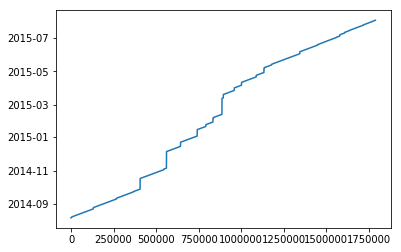

In [28]:
# Draw the plot of time column to make sure that things are arranged in the right order
plt.plot(df_pl12_indexed['Date_Time_new'])

In [29]:
# Describe the dataframe 
df_pl12_indexed.describe()

,Time_sec,Date_Time,Step,Cycle,Current_Amp,Voltage_Volt,Charge_Ah,Discharge_Ah
count,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06,1.788455e+06
mean,6.309269e+05,7.360084e+05,1.072928e+01,4.465146e+01,1.328818e-03,4.037308e+00,4.625508e+01,4.595226e+01
std,4.373463e+05,1.184929e+02,2.077323e+00,2.884129e+01,8.780730e-01,2.698253e-01,2.933269e+01,2.904083e+01
min,8.150746e-02,7.358176e+05,1.000000e+00,1.000000e+00,-3.001397e+00,2.748463e+00,0.000000e+00,0.000000e+00
25%,2.788125e+05,7.358942e+05,1.000000e+01,2.000000e+01,0.000000e+00,3.925225e+00,2.134357e+01,2.131180e+01
50%,5.765995e+05,7.360363e+05,1.000000e+01,4.100000e+01,2.905629e-02,4.198621e+00,4.399779e+01,4.355060e+01
75%,9.053943e+05,7.361166e+05,1.200000e+01,6.900000e+01,4.220106e-01,4.200404e+00,6.961473e+01,6.887312e+01
max,2.139564e+06,7.361779e+05,2.000000e+01,1.010000e+02,2.085116e+00,4.247663e+00,1.150644e+02,1.158191e+02


In [48]:
df_sample = df_pl12_indexed.iloc[0:100000, :]


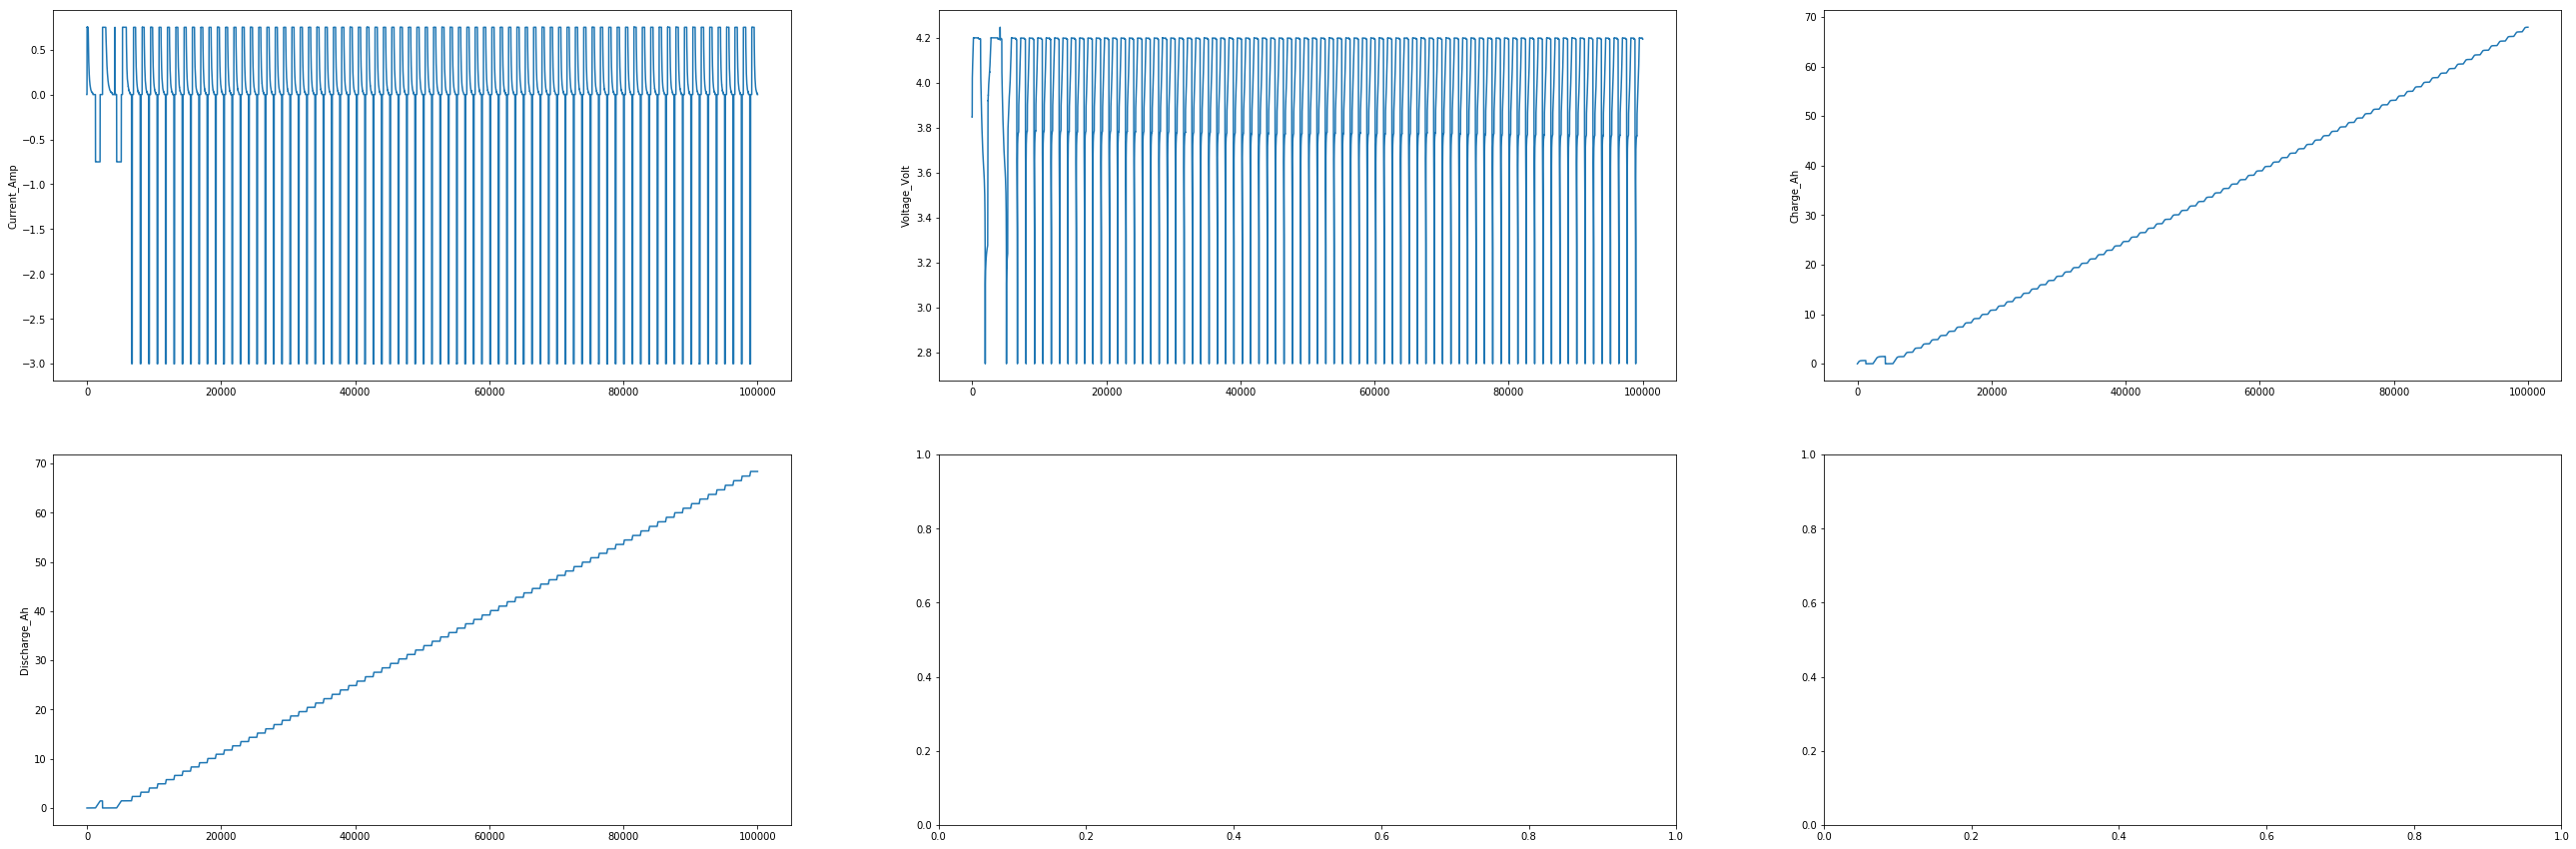

In [50]:
fig, ax = plt.subplots(2, 3, figsize = (45,15))
sns.lineplot(x = df_sample.index, y = df_sample['Current_Amp'], ax = ax[0][0])
sns.lineplot(x = df_sample.index, y = df_sample['Voltage_Volt'], ax = ax[0][1])
sns.lineplot(x = df_sample.index, y = df_sample['Charge_Ah'], ax = ax[0][2])
sns.lineplot(x = df_sample.index, y = df_sample['Discharge_Ah'], ax = ax[1][0])

In [ ]:
df

In [ ]:
df['Date_Time_new1'] = df['Date_Time'].apply(lambda x: datetime.datetime.fromordinal(int(x)) + datetime.timedelta(days=x%1) - datetime.timedelta(days = 366)  )